<a href="https://colab.research.google.com/github/kaarthikalagappan/ai_course_projects/blob/master/HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
# Some code snippets adapted from Dr. Wocjan's notebook for Logistic Regression, simple numpy implementation, and linear_regression_gradient_descent notebooks
# with the help of the article "Tutorial: Linear Regression with Stochastic Gradient Descent" authored by Raimi Karim
# Reused code from my problem 1 and 2

###Function to generate random data

In [0]:
def get_random_data(w, b, mu, sigma, m):
    data = np.zeros(shape=(m, 2))
    labels = np.zeros(shape=(m, 1))
    x_1_arr = np.zeros(shape=(m, 1))
    x_2_arr = np.zeros(shape=(m, 1))
    for i in range(m):
        rnd = random.random()
        if rnd < 0.5:
            c = 0
        else:
            c = 1
        x_1 = np.random.uniform(0, 1)
        n = np.random.normal(mu, sigma)
        x_2 = (w * x_1) + b + ((-1)**c * n)
        data[i] = [x_1, x_2]
        labels[i] = c
        x_1_arr[i] = x_1
        x_2_arr[i] = x_2
    return data, labels, x_1_arr, x_2_arr

###Function to display the randomly generate data and true line from that

In [0]:
def display_random_data(data, labels):
    x, y = data.T
    for i in range(training_size):
        if labels[i] == 1:
            color = "r."
        else:
            color = "b."
        plt.plot(x[i], y[i], color)
    y_2 = 2 * (x) + 3
    plt.plot(x[:training_size], y_2[:training_size], "y-", label="true line")

###Generating random data and splitting 80% of them into training data and the rest 20% into testing data

In [0]:
data, labels, x_1, x_2 = get_random_data(2, 3, .19, .15, 30000)

training_size = int(labels.size * .8)
test_size = labels.size - training_size
test_indicies = labels.size - test_size
training_data = data[:training_size]
training_labels = labels[:training_size]
test_data = data[test_indicies:]
test_labels = labels[test_indicies:]

###Logistic Regression Model (written from scratch)



In [0]:
weights = [0]
bias = 0
learn_rate = .001

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def init_weights(size):
    global weights
    weights = np.zeros(size)

def fit(x_train, y_train, epochs, test_vals = None):
    global weights, bias, learn_rate

    if test_vals:
        x_test, y_test = test_vals

    for i in range(0, epochs):
        shuffled_indices = np.random.permutation(training_size)
        x_shuffled = x_train[shuffled_indices]
        y_shuffled = y_train[shuffled_indices]

        for j in range(training_size):
            x = x_shuffled[j:j+1]
            y = y_shuffled[j:j+1]
            z = np.matmul(x, weights.reshape((weights.size),1)) + bias
            a = sigmoid(z)

            weights = weights - (learn_rate * ((a-y)*x))
            bias = bias - (learn_rate * (a-y))

        print("Epoch {0}/{1}".format(i+1, epochs)) 
        loss_amount, accuracy_rate = calculate_loss_acc(x_train, y_train)
        if test_vals:
            val_loss_amt, val_accuracy_rate = calculate_loss_acc(x_test, y_test)
            print("loss: {0:.4f} - accuracy: {1:.4f}  |  val_loss: {2:.4f} - val_accuracy: {3:.4f}".format(loss_amount, accuracy_rate, val_loss_amt, val_accuracy_rate))
        else:
            print("loss: {0:.4f} - accuracy: {1:.4f}".format(loss_amount, accuracy_rate))

def calculate_loss_acc(x, y):
    global weights, bias
    z = np.matmul(x, weights.reshape((weights.size), 1)) + bias
    a = sigmoid(z)
    loss_amount = (np.mean(-y * np.log(a) - (1 - y) * np.log(1 - a)))
    accuracy_rate = 1.5 - (calculate_loss_amt(x, y))
    return loss_amount, accuracy_rate

###Training the model and graphing the data

Epoch 1/15
loss: 0.6784 - accuracy: 0.8216  |  val_loss: 0.6786 - val_accuracy: 0.8214
Epoch 2/15
loss: 0.6629 - accuracy: 0.8371  |  val_loss: 0.6628 - val_accuracy: 0.8372
Epoch 3/15
loss: 0.6544 - accuracy: 0.8456  |  val_loss: 0.6537 - val_accuracy: 0.8463
Epoch 4/15
loss: 0.6366 - accuracy: 0.8634  |  val_loss: 0.6366 - val_accuracy: 0.8634
Epoch 5/15
loss: 0.6242 - accuracy: 0.8758  |  val_loss: 0.6243 - val_accuracy: 0.8757
Epoch 6/15
loss: 0.6131 - accuracy: 0.8869  |  val_loss: 0.6136 - val_accuracy: 0.8864
Epoch 7/15
loss: 0.6020 - accuracy: 0.8980  |  val_loss: 0.6021 - val_accuracy: 0.8979
Epoch 8/15
loss: 0.5916 - accuracy: 0.9084  |  val_loss: 0.5918 - val_accuracy: 0.9082
Epoch 9/15
loss: 0.5816 - accuracy: 0.9184  |  val_loss: 0.5818 - val_accuracy: 0.9182
Epoch 10/15
loss: 0.5772 - accuracy: 0.9228  |  val_loss: 0.5769 - val_accuracy: 0.9231
Epoch 11/15
loss: 0.5647 - accuracy: 0.9353  |  val_loss: 0.5647 - val_accuracy: 0.9353
Epoch 12/15
loss: 0.5537 - accuracy: 0.94

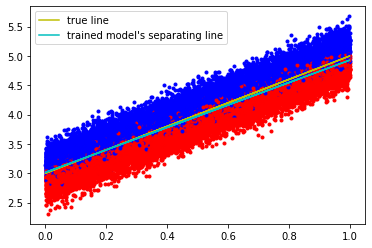

In [0]:
init_weights(2)
fit(training_data, training_labels, 15, (test_data, test_labels))

weights = weights.reshape((weights.size),1)
w1 = weights[0]
w2 = weights[1]

w1x1 = x_1[:training_size]*w1
if w2 != 0:
    x_2_real = (-(np.add(w1x1, bias))) / w2
else:
    x_2_real = (-(np.add(w1x1, bias)))

display_random_data(data, labels)
plt.plot(x_1[:training_size], x_2_real, "c-", label="trained model's separating line")
plt.legend()


###Heatmap

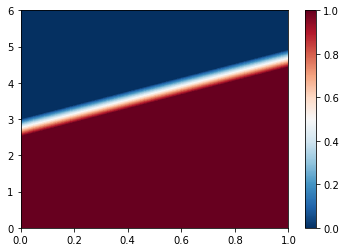

In [0]:
#an answer from a stackoverflow question helped me code up the heatmap
y, x = np.meshgrid(np.linspace(0, 6, 1000), np.linspace(0, 1, 1000))

z = (x*w1) + (y*w2) + bias

z_min, z_max = 0, 1

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=z_min, vmax=z_max)

ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()
